In [1]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

K.tensorflow_backend._get_available_gpus()

base_dir = r'C:\Users\Vítor\Documents\TCC\Banco de Dados\Imagens The Deep\Imagens The Deep\BD'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

Using TensorFlow backend.


In [5]:
from keras import layers
from keras import models
#Criando a CNN
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 256)       295168    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 256)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 512)       1180160   
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 512)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 15, 15, 512)       2359808   
__________

In [7]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
from keras.preprocessing.image import ImageDataGenerator

# Todas as imagens em nova scale
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        
        train_dir,
        # Todas as images para novo tamanho de 150x150
        target_size=(150, 150),
        batch_size=20,
        # Como foi usado a perda binary_crossentropy, precisamos de rótulos binários
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 76608 images belonging to 2 classes.
Found 16416 images belonging to 2 classes.


In [9]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [10]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 131s 1s/step - loss: 0.6849 - acc: 0.5695 - val_loss: 0.6822 - val_acc: 0.5500
Epoch 2/30
100/100 [==============================] - 102s 1s/step - loss: 0.6647 - acc: 0.6070 - val_loss: 0.7459 - val_acc: 0.5810
Epoch 3/30
100/100 [==============================] - 100s 1s/step - loss: 0.6557 - acc: 0.6265 - val_loss: 0.6227 - val_acc: 0.6320
Epoch 4/30
100/100 [==============================] - 102s 1s/step - loss: 0.6329 - acc: 0.6465 - val_loss: 0.6317 - val_acc: 0.6150
Epoch 5/30
100/100 [==============================] - 101s 1s/step - loss: 0.6151 - acc: 0.6550 - val_loss: 0.6249 - val_acc: 0.6380
Epoch 6/30
 49/100 [=============>................] - ETA: 44s - loss: 0.5786 - acc: 0.6857

ResourceExhaustedError: OOM when allocating tensor with shape[20,256,72,72] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node training/RMSprop/gradients/max_pooling2d_11/MaxPool_grad/MaxPoolGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


A acurácia da validação é de: 0.6259999984502792
A perda da validação é de: 0.8641980803012848


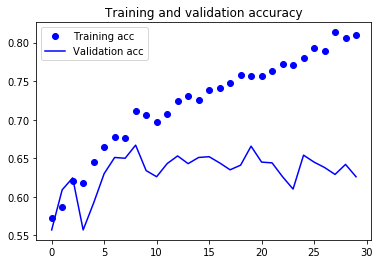

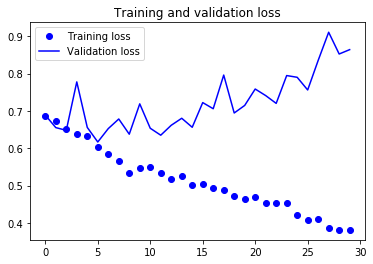

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
print('A acurácia da validação é de:', val_acc[29])
print('A perda da validação é de:', val_loss[29])
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()